In [3]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import PIL
from tensorflow.keras import datasets, layers, models
from keras.layers import BatchNormalization, Conv2D, MaxPooling2D,Activation, Flatten, Dropout, Dense
from keras_tuner import HyperModel, HyperParameters, RandomSearch
import keras_tuner as kt
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ModelCheckpoint

In [4]:
from PIL import Image
import os

# create data generators

In [5]:
target_size = (96,96)

In [6]:
batch_size = 128

In [7]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range = .3,
    zoom_range = .3,
    horizontal_flip=True,
    brightness_range = [.4,1.5],
    rotation_range = 30,
    width_shift_range=0.15,
    height_shift_range=0.15
    #featurewise_std_normalization=False # not sure how this will work here
)

In [8]:
train_generator = train_datagen.flow_from_directory(
        r'C:/Users/natha/OneDrive/Desktop/datascience/machine learning and predictive/final/dataset/output/train',
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical')

Found 32430 images belonging to 151 classes.


In [9]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [10]:
test_data_generator = test_datagen.flow_from_directory(
    r'C:/Users/natha/OneDrive/Desktop/datascience/machine learning and predictive/final/dataset/output/val',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 8091 images belonging to 151 classes.


# set up model according to hyper parameters

In [ ]:
#,validation_data = test_data_generator

In [ ]:
model = keras.Sequential()
model.add(Conv2D(32, 3, padding = 'same', activation = 'relu', input_shape =(96, 96, 3), kernel_initializer = 'he_normal'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(151, activation = 'softmax'))

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate = 1e-2),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
model.summary()

# Run Model

In [11]:
checkpoint = ModelCheckpoint('advanced96/best_model.h5', verbose = 1, monitor = 'val_accuracy', save_best_only = True)

In [12]:
model = keras.models.load_model('advanced96/model_advanced96.h5')

In [13]:
history = model.fit(train_generator, epochs = 20, validation_data = test_data_generator,
                              callbacks = [checkpoint])

Epoch 1/20
254/254 [==============================] - ETA: 0s - loss: 1.0326 - accuracy: 0.7137
Epoch 1: val_accuracy improved from -inf to 0.73501, saving model to advanced96\best_model.h5
254/254 [==============================] - 1237s 5s/step - loss: 1.0326 - accuracy: 0.7137 - val_loss: 1.1051 - val_accuracy: 0.7350
Epoch 2/20
254/254 [==============================] - ETA: 0s - loss: 1.0126 - accuracy: 0.7173
Epoch 2: val_accuracy did not improve from 0.73501
254/254 [==============================] - 1230s 5s/step - loss: 1.0126 - accuracy: 0.7173 - val_loss: 1.1267 - val_accuracy: 0.7212
Epoch 3/20
254/254 [==============================] - ETA: 0s - loss: 0.9984 - accuracy: 0.7233
Epoch 3: val_accuracy did not improve from 0.73501
254/254 [==============================] - 1334s 5s/step - loss: 0.9984 - accuracy: 0.7233 - val_loss: 1.1312 - val_accuracy: 0.7236
Epoch 4/20
254/254 [==============================] - ETA: 0s - loss: 1.0196 - accuracy: 0.7155
Epoch 4: val_accuracy

# Plot curves

Text(0.5, 1.0, 'loss')

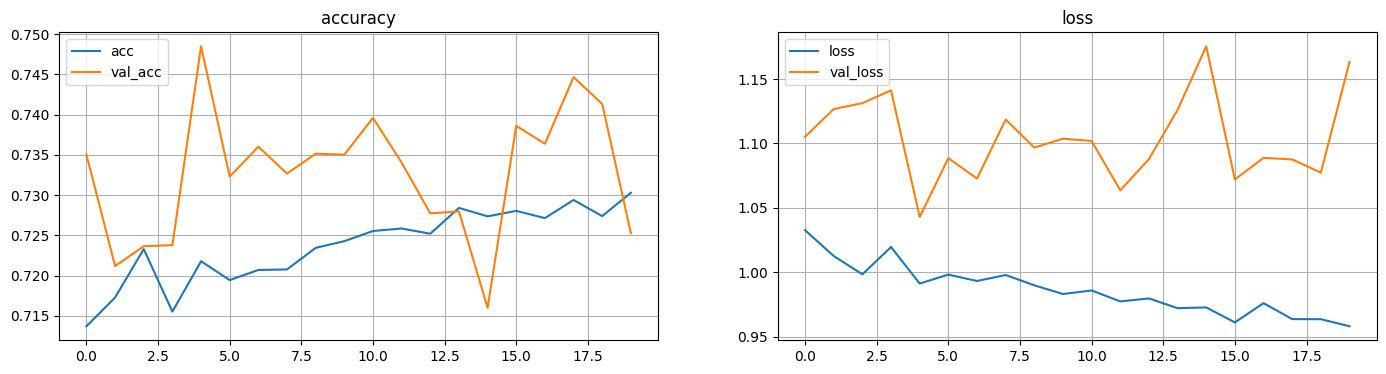

In [14]:
# Plot learning curves
fig = plt.figure(figsize = (17, 4))
    
plt.subplot(121)
plt.plot(history.history['accuracy'], label = 'acc')
plt.plot(history.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.grid()
plt.title(f'accuracy')

plt.subplot(122)
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.grid()
plt.title(f'loss')

In [15]:
hisorydf = pd.DataFrame(history.history)
hisorydf.to_csv('advanced96/my_model_advanced96_150.csv')

# Save models

In [16]:
model.save('advanced96/model_advanced96.h5')

# predictions

In [22]:
from tensorflow.keras.utils import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input

model = keras.models.load_model('advanced96/best_model.h5')

In [76]:
directory = 'whothatpokemon2'

In [90]:
class_labels = []
for i in os.listdir('output/train'):
    class_labels.append(i)

In [91]:
predictionlist = []
confidence = []
for image in os.listdir(directory): 
    my_image = load_img(os.path.join(directory,image), target_size=target_size)
    my_image = img_to_array(my_image)
    my_image = my_image/255
    my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
    #my_image = preprocess_input(my_image)
    prediction = model.predict(my_image)
    predicted_class_index = np.argmax(prediction)
    predictionlist.append(class_labels[predicted_class_index])
    confidence.append(round(prediction[0][predicted_class_index] * 100, 2))

1/1 [==============================] - 0s 30ms/step


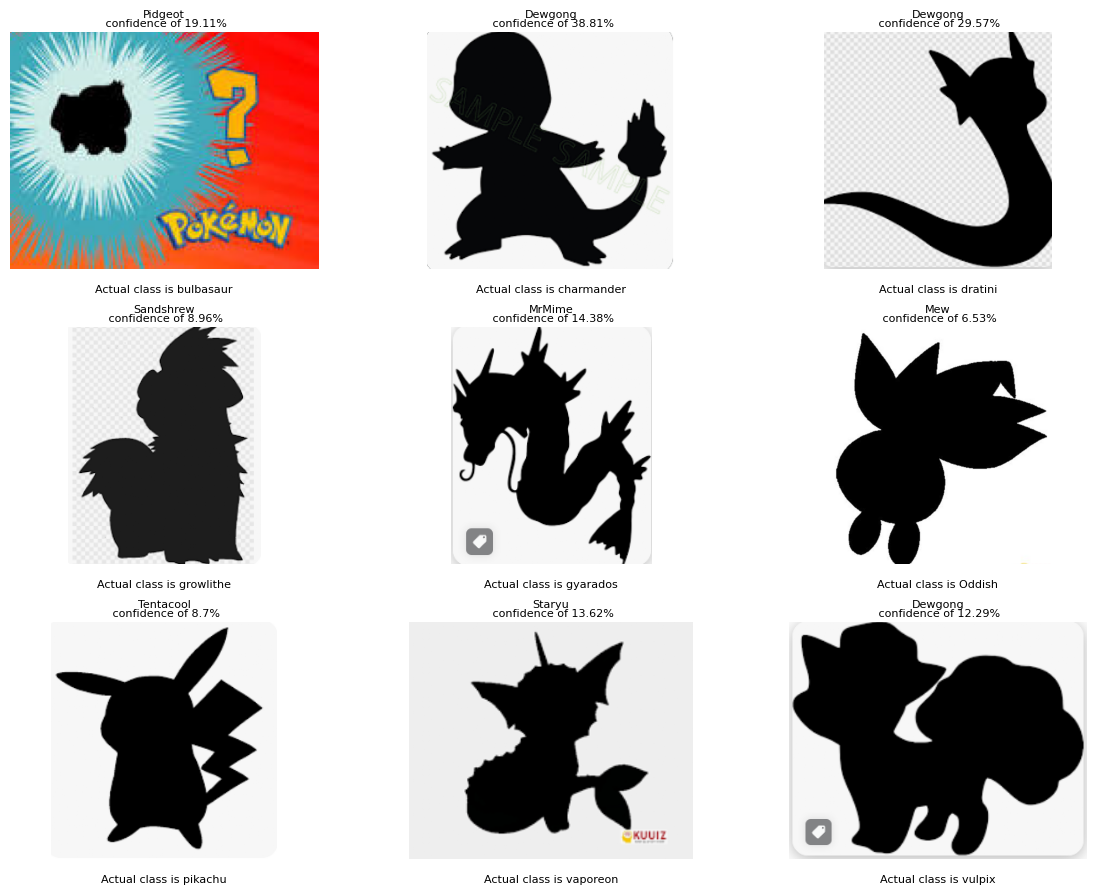

In [92]:


# Get a list of all image files in the directory
image_files = [file for file in os.listdir(directory) if file.endswith(('.png', '.PNG'))]

# Set up the plot with multiple subplots
num_images = len(image_files)
num_cols = 3  # Number of columns in the plot
num_rows = (num_images - 1) // num_cols + 1  # Number of rows in the plot

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 9))

# Loop through the image files and plot them
for i, file in enumerate(image_files):
    row = i // num_cols
    col = i % num_cols

    # Load the image using matplotlib's imread function
    image_path = os.path.join(directory, file)
    image = plt.imread(image_path)

    # Plot the image on the corresponding subplot
    axes[row, col].imshow(image)
    axes[row, col].axis('off')
    axes[row, col].text(0.5, -0.1, f'Actual class is {os.path.splitext(file)[0]}', fontsize=8, ha='center', transform=axes[row, col].transAxes)
    axes[row, col].text(0.5, 1.06, predictionlist[i], fontsize=8, ha='center', transform=axes[row, col].transAxes)
    axes[row, col].text(0.5, 1.02, f' confidence of {confidence[i]}%', fontsize=8, ha='center', transform=axes[row, col].transAxes)
# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()